<a href="https://colab.research.google.com/github/dipu-malitha/Python-Projects/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Confusion Matrix and Performance Metrics**

What is a Confusion Matrix?

A confusion matrix is a table used to describe the performance of a classification model by comparing the predicted values with the actual values. It is structured as follows for a binary classification problem:

|                     | **Actual Positive** | **Actual Negative** |
|---------------------|---------------------|---------------------|
| **Predicted Positive** | TP (True Positive)  | FP (False Positive) |
| **Predicted Negative** | FN (False Negative) | TN (True Negative)  |

Where:
- **True Positives (TP)**: Correctly predicted positive cases.
- **True Negatives (TN)**: Correctly predicted negative cases.
- **False Positives (FP)**: Incorrectly predicted positive cases (Type I error).
- **False Negatives (FN)**: Incorrectly predicted negative cases (Type II error).

From this matrix, various performance metrics can be derived, such as accuracy, precision, recall, and F1 score.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

**Generate the dataset**

In [5]:
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

In [3]:
X

array([[-0.43964281,  0.54254734, -0.82241993,  0.40136622, -0.85484   ],
       [ 2.82223116, -2.48085944, -1.14769139, -2.10113103,  3.04027792],
       [ 1.61838572, -1.36947785, -2.08411294, -1.17965857,  1.61360231],
       ...,
       [ 1.56038977, -0.22904063, -0.2344078 , -0.61957623, -1.10985576],
       [ 0.88692467, -0.22294581, -1.3088204 , -0.39617745, -0.40427827],
       [-2.74710392,  1.85043021, -0.19382614,  1.77741855, -1.58083381]])

**Split the dataset into training and testing sets**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Initialize and train the decision tree classifier**

In [7]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Make predictions on the test set**

In [8]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

**Calculate the confusion matrix**

In [9]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[119,  27],
       [ 14, 140]])

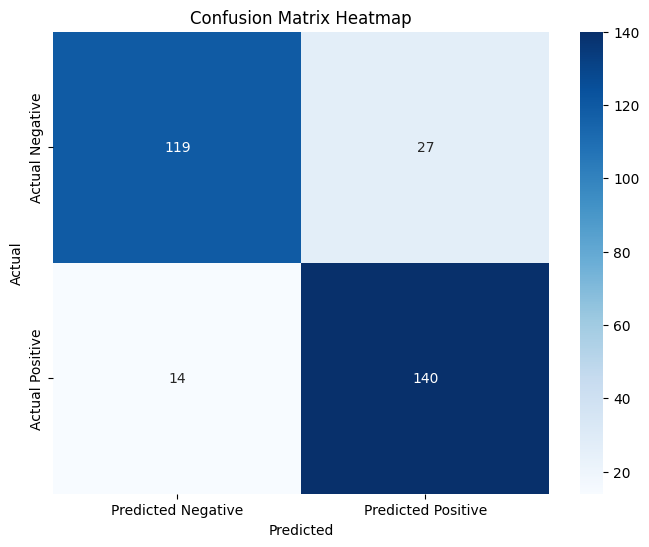

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

**Split the confusion matrix into TP, FP, FN, TN**

The ravel() method is used to flatten the confusion matrix into a 1D array.

In [17]:
tn, fp, fn, tp = cm.ravel()

In [18]:
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Negatives (TN): {tn}")

True Positives (TP): 140
False Positives (FP): 27
False Negatives (FN): 14
True Negatives (TN): 119


**Calculate various performance metrics**

In [19]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [20]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8633333333333333
Precision: 0.8383233532934131
Recall: 0.9090909090909091
F1 Score: 0.8722741433021807


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       146
           1       0.84      0.91      0.87       154

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300



**Display ROC-Curve**

In [22]:
from sklearn.metrics import RocCurveDisplay

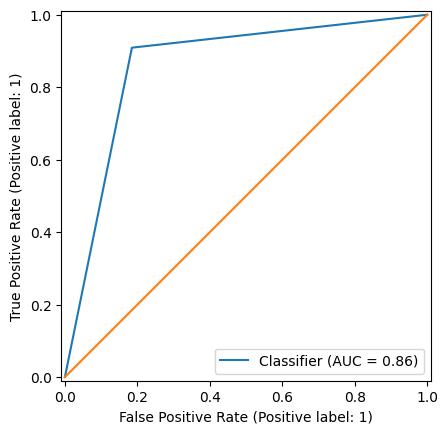

In [23]:
RocCurveDisplay.from_predictions(y_test, clf.predict(X_test))
plt.plot([0,1],[0,1])
plt.show()